### Description about project
Dataset -This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
#### Columns
InvoiceNo  a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation


StockCode - a 5-digit integral number uniquely assigned to each distinct producto

Description- product namec

Quantity- the quantities of each product (item) per transaction

InvoiceDate- the day and time when each transaction was generatedene	


UnitPrice- product price per unit	sterling

CustomerID- a 5-digit integral number uniquely assigned to each customer

Country  - the name of the country where each customer residesdes		no

#### Aim of this project
Sales time series anaysis 

In [90]:
import pandas as pd
import numpy as np

 ### Load the dataset

In [91]:
dataset = pd.read_excel('Online Retail.xlsx')

In [92]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [93]:
dataset.shape

(541909, 8)

### Data cleaning and Data preprocessing

In [94]:
#check for missing values
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [95]:
#Remove rows with missing customerID
dataset = dataset.dropna(subset=['CustomerID'])

In [96]:
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [97]:
#remove rows with negative or zero quantities and unit prices
dataset = dataset[(dataset['Quantity']>0) & (dataset['UnitPrice']>0)]

In [98]:
#remove duplicates
dataset = dataset.drop_duplicates()

In [99]:
#check for canceled orders (invoice number starting with 'C')
dataset = dataset[~dataset['InvoiceNo'].astype(str).str.startswith('C')]

In [100]:
dataset.shape

(392692, 8)

In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [102]:
#Check unique values in categoricalcolumns
dataset.nunique()

InvoiceNo      18532
StockCode       3665
Description     3877
Quantity         301
InvoiceDate    17282
UnitPrice        440
CustomerID      4338
Country           37
dtype: int64

In [103]:
# Create the 'TotalAmount' column as the product of 'Quantity' and 'UnitPrice'
dataset['TotalAmount'] = dataset['Quantity'] * dataset['UnitPrice']
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [104]:
dataset = dataset.reset_index(drop=True)
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [105]:
#Calculate basic statistics for numerical columns
numberic_stats = dataset[['Quantity','UnitPrice','TotalAmount']].describe()
numberic_stats

,Quantity,UnitPrice,TotalAmount
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,22.631500
std,180.492832,22.241836,311.099224
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.450000
75%,12.000000,3.750000,19.800000
max,80995.000000,8142.750000,168469.600000


In [106]:
#Calculate the total revenue by country
country_revenue = dataset.groupby('Country')['TotalAmount'].agg(['sum','count']).sort_values('sum',ascending =False)
country_revenue

,sum,count
Country,,
United Kingdom,7285024.644,349203
Netherlands,285446.340,2359
EIRE,265262.460,7226
Germany,228678.400,9025
France,208934.310,8326
Australia,138453.810,1181
Spain,61558.560,2479
Switzerland,56443.950,1841
Belgium,41196.340,2031


In [107]:
# Create new features
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset['Year'] = dataset['InvoiceDate'].dt.year
dataset['Month'] = dataset['InvoiceDate'].dt.month
dataset['Day'] = dataset['InvoiceDate'].dt.day
dataset['DayOfWeek'] = dataset['InvoiceDate'].dt.dayofweek

In [108]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2


In [109]:
dataset.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,DayOfWeek
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,4
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,4
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,4
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,4
392691,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011,12,9,4


### Exploratory Data Analysis (EDA)

#### Visualize Sales Trends

Aggregated time series data (daily):
         Date  TotalSales
0  2010-12-01    46192.49
1  2010-12-02    47197.57
2  2010-12-03    23876.63
3  2010-12-05    31361.28
4  2010-12-06    31009.33


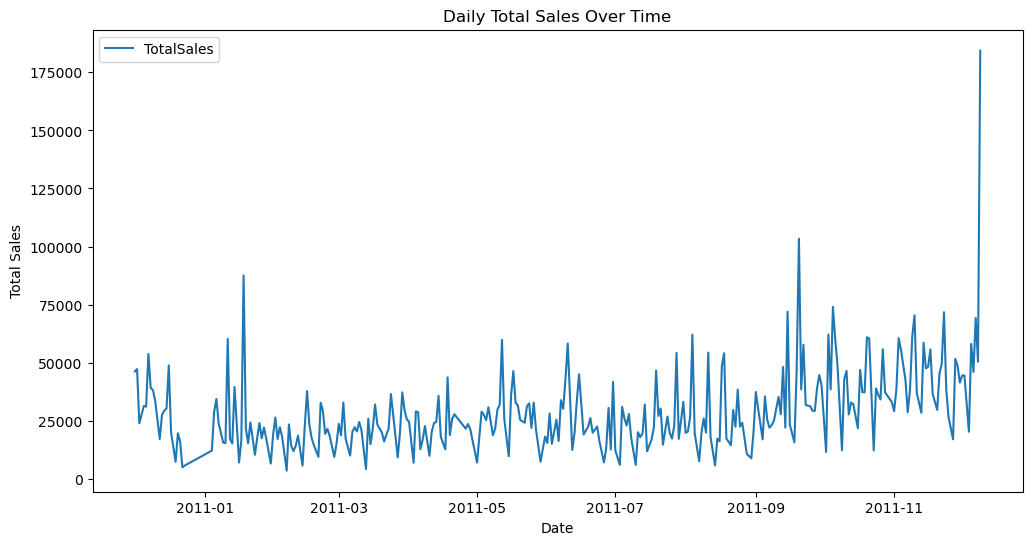

In [110]:
import matplotlib.pyplot as plt
# Aggregate sales data by date
time_series = dataset.groupby(dataset['InvoiceDate'].dt.date)['TotalAmount'].sum()

# Convert to a DataFrame for easier handling
time_series = time_series.reset_index()
time_series.columns = ['Date', 'TotalSales']

# Sort by date
time_series = time_series.sort_values('Date')

# Display the first few rows of the time series data
print("Aggregated time series data (daily):")
print(time_series.head())

# Plot the time series
time_series.plot(x='Date', y='TotalSales', figsize=(12, 6), title='Daily Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

Aggregated time series data (dayofweek):
   DayOfWeek   TotalSales
0          0  1363604.401
1          1  1697733.801
2          2  1584283.830
3          3  1973015.730
4          4  1483080.811


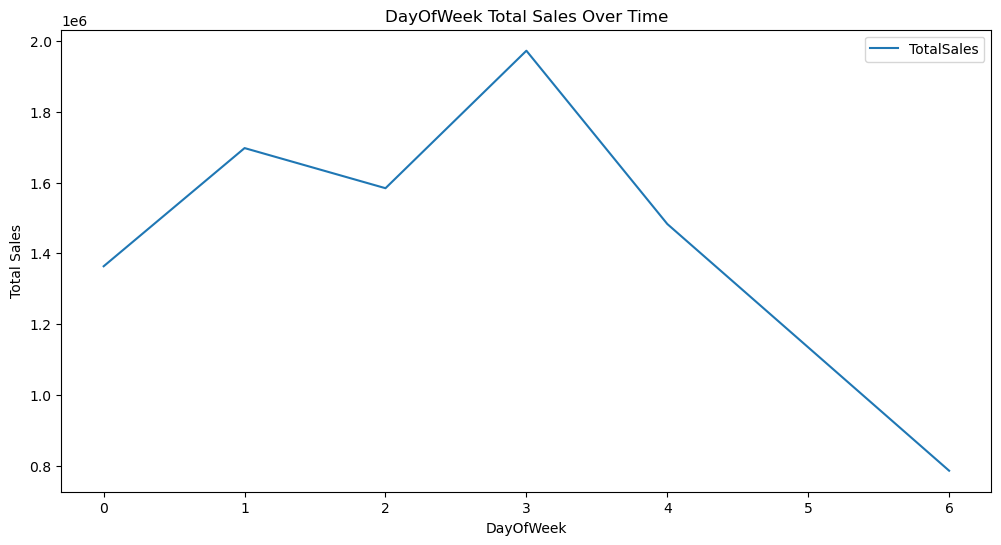

In [111]:
# Aggregate sales data by weekofday
time_series = dataset.groupby(dataset['DayOfWeek'])['TotalAmount'].sum()

# Convert to a DataFrame for easier handling
time_series = time_series.reset_index()
time_series.columns = ['DayOfWeek', 'TotalSales']

# Sort by date
time_series = time_series.sort_values('DayOfWeek')

# Display the first few rows of the time series data
print("Aggregated time series data (dayofweek):")
print(time_series.head())

# Plot the time series
time_series.plot(x='DayOfWeek', y='TotalSales', figsize=(12, 6), title='DayOfWeek Total Sales Over Time')
plt.xlabel('DayOfWeek')
plt.ylabel('Total Sales')
plt.show()

Aggregated time series data (monthly):
   Month  TotalSales
0      1  568101.310
1      2  446084.920
2      3  594081.760
3      4  468374.331
4      5  677355.150


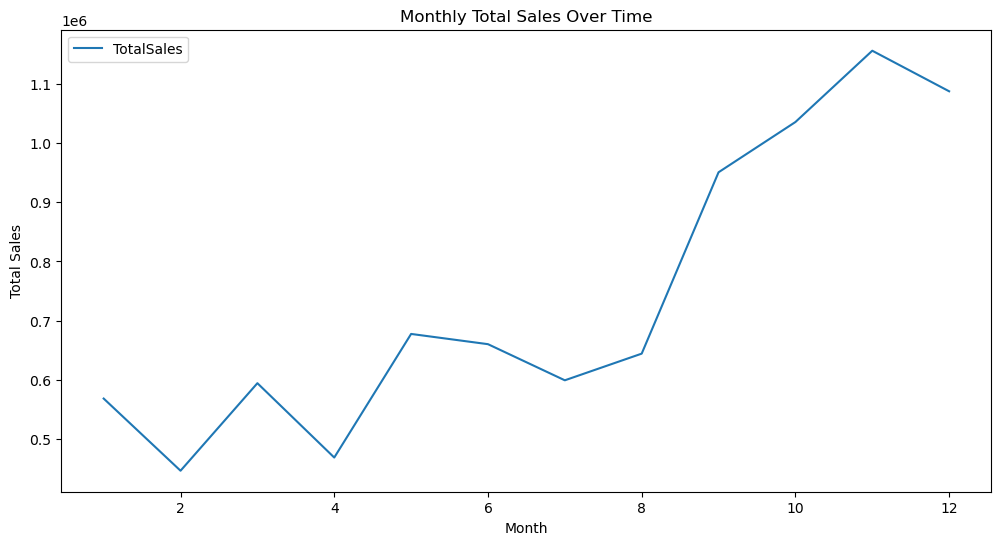

In [112]:
# Aggregate sales data by mothly
time_series = dataset.groupby(dataset['Month'])['TotalAmount'].sum()

# Convert to a DataFrame for easier handling
time_series = time_series.reset_index()
time_series.columns = ['Month', 'TotalSales']

# Sort by date
time_series = time_series.sort_values('Month')

# Display the first few rows of the time series data
print("Aggregated time series data (monthly):")
print(time_series.head())

# Plot the time series
time_series.plot(x='Month', y='TotalSales', figsize=(12, 6), title='Monthly Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

Aggregated time series data (yearly):
   Year   TotalSales
0  2010   570422.730
1  2011  8316786.164


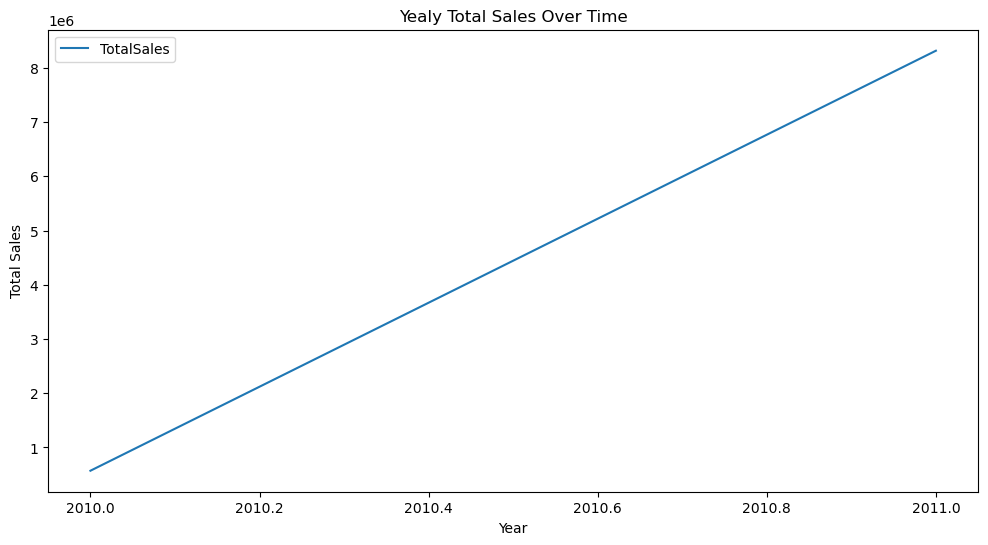

In [113]:
# Aggregate sales data by yearly
time_series = dataset.groupby(dataset['Year'])['TotalAmount'].sum()

# Convert to a DataFrame for easier handling
time_series = time_series.reset_index()
time_series.columns = ['Year', 'TotalSales']

# Sort by date
time_series = time_series.sort_values('Year')

# Display the first few rows of the time series data
print("Aggregated time series data (yearly):")
print(time_series.head())

# Plot the time series
time_series.plot(x='Year', y='TotalSales', figsize=(12, 6), title='Yealy Total Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

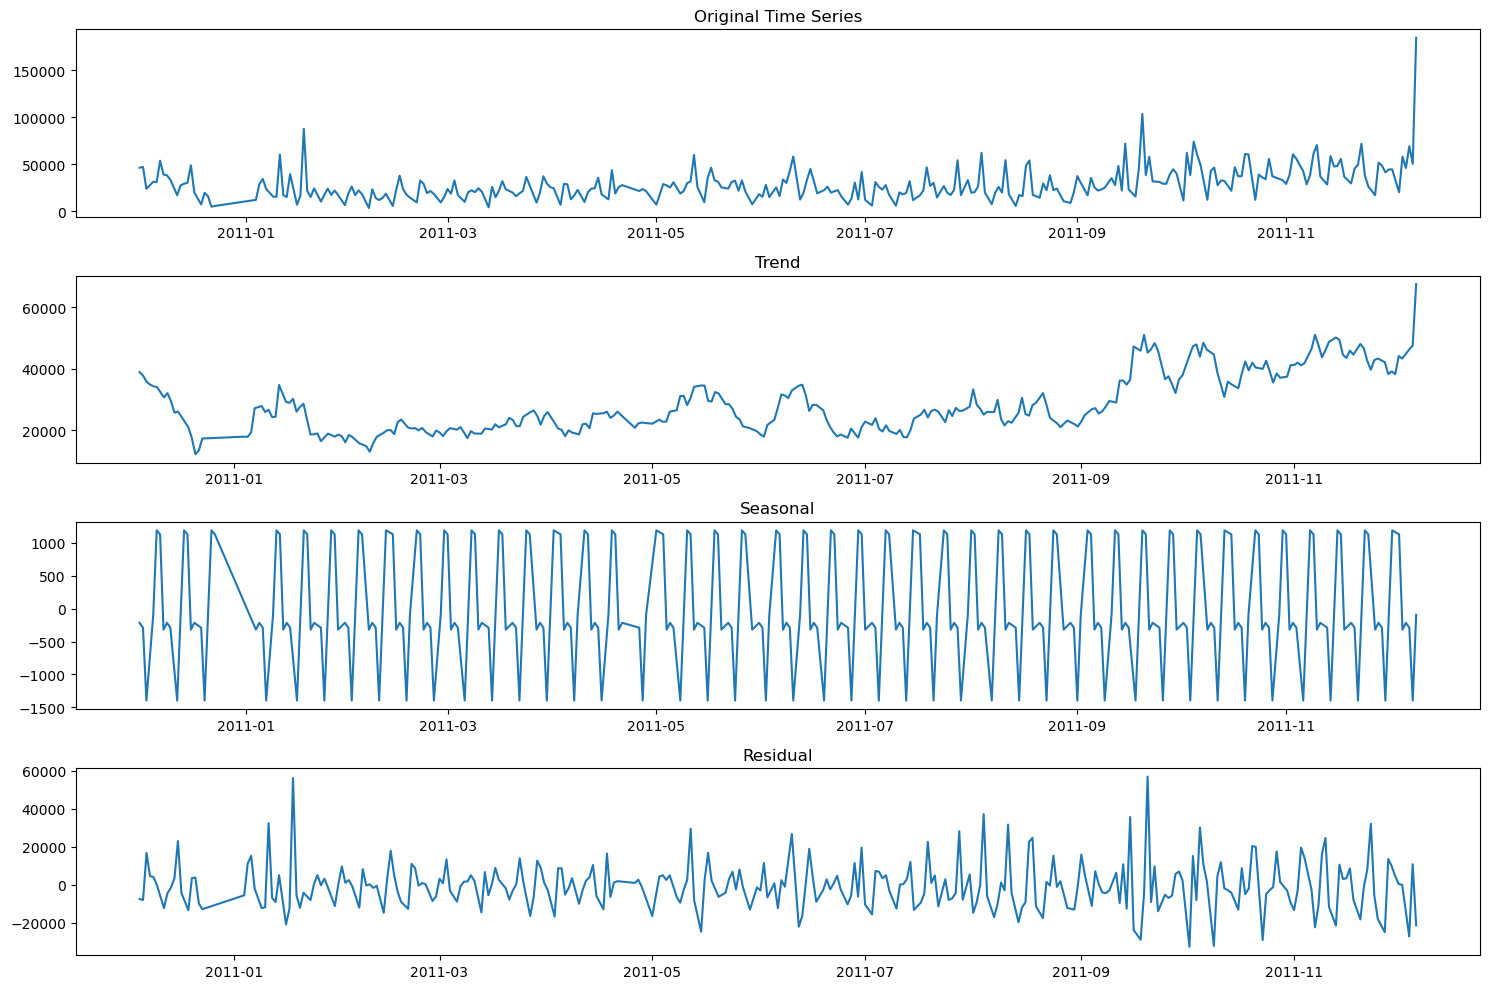

Time Series Statistics:
Start date: 2010-12-01
End date: 2011-12-09
Mean daily sales: 29138.39
Standard deviation: 17834.95
Minimum daily sales: 3439.67
Maximum daily sales: 184329.66


In [114]:
# Aggregate sales data by date
time_series = dataset.groupby(dataset['InvoiceDate'].dt.date)['TotalAmount'].sum()

# Convert to a DataFrame for easier handling
time_series = time_series.reset_index()
time_series.columns = ['Date', 'TotalSales']

# Set 'Date' as the index
ts = time_series.set_index('Date')['TotalSales']

# Perform seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition with weekly seasonality (period=7)
decomposition = seasonal_decompose(ts, period=7)  # Adjust period based on your data frequency (7 for weekly)

# Plot decomposition results
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Original time series
plt.subplot(411)
plt.plot(ts)
plt.title('Original Time Series')

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()

# Calculate and display basic statistics of the time series
print("Time Series Statistics:")
print("Start date:", ts.index.min())
print("End date:", ts.index.max())
print("Mean daily sales:", round(ts.mean(), 2))
print("Standard deviation:", round(ts.std(), 2))
print("Minimum daily sales:", round(ts.min(), 2))
print("Maximum daily sales:", round(ts.max(), 2))


In [115]:
# Calculate the mean and standard deviation of the residuals
residuals = decomposition.resid
mean_resid = np.mean(residuals)
std_resid = np.std(residuals)

# Define a threshold for outlier detection
threshold = 2 * std_resid

# Identify potential outliers
outliers = residuals[np.abs(residuals - mean_resid) > threshold]

# Print outlier dates and values
print(outliers)

Date
2011-01-11    32436.381446
2011-01-18    56138.379153
2011-05-12    29535.531024
2011-06-10    26718.299471
2011-07-28    28170.959726
2011-08-04    37191.806861
2011-08-11    31675.982452
2011-09-15    35670.005432
2011-09-18   -28859.666243
2011-09-20    56931.266296
2011-10-02   -32565.310282
2011-10-05    30114.185034
2011-10-09   -32116.298976
2011-10-23   -28999.067990
2011-11-23    32120.972176
2011-12-04   -27161.731412
Name: resid, dtype: float64


In [116]:
# Create a mask for rows without outliers
non_outlier_mask = np.abs(residuals - mean_resid) <= threshold

# Filter out the outliers
filtered_ts = residuals[non_outlier_mask]

print("Filtered Residuals:", filtered_ts)


Filtered Residuals: Date
2010-12-05    -7466.996395
2010-12-06    -7958.880847
2010-12-07    16781.074303
2010-12-08     4559.221024
2010-12-09     4095.742575
                  ...     
2011-11-30     4534.819471
2011-12-01      369.712176
2011-12-02       13.932010
2011-12-05    10848.915309
2011-12-06   -21335.307425
Name: resid, Length: 283, dtype: float64


### Build the model

Train dtype: float64, Validation dtype: float64


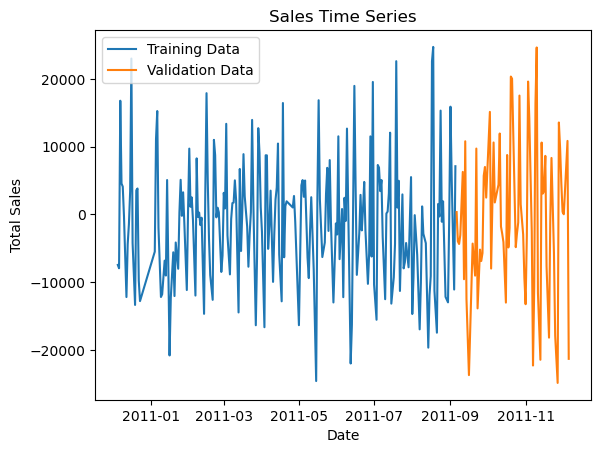

In [124]:

# Divide into train and validation sets
train = filtered_ts[:int(0.7 * len(ts))]
valid = filtered_ts[int(0.7 * len(ts)):]

# Ensure train and valid are correctly defined as Series
print(f"Train dtype: {train.dtypes}, Validation dtype: {valid.dtypes}")

# Plotting the training and validation data
train.plot(label="Training Data", legend=True)
valid.plot(label="Validation Data", legend=True)
plt.title("Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

In [125]:
# Remove zero values in the validation set
valid = valid[valid > 0]

# Verify zero values are removed
print(f"Validation set after removing zeros: {valid.describe()}")


Validation set after removing zeros: count       32.000000
mean      9447.303155
std       6592.206374
min         13.932010
25%       4163.687434
50%       9242.479452
75%      13710.407256
max      24647.745309
Name: resid, dtype: float64


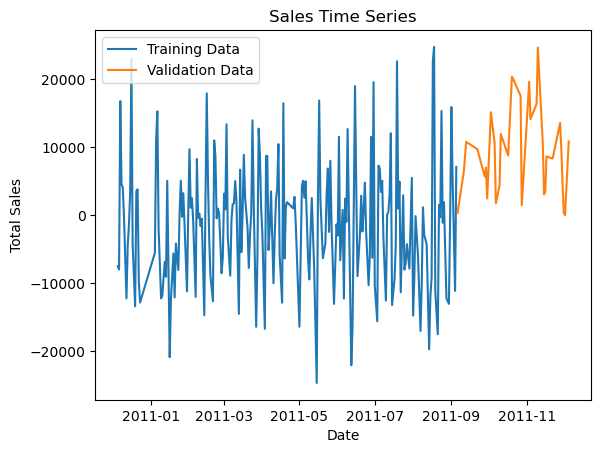

In [126]:
#transform the data when making real prediction
filtered_ts = np.log(filtered_ts)

# Plotting the training and validation data
train.plot(label="Training Data", legend=True)
valid.plot(label="Validation Data", legend=True)
plt.title("Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

In [129]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the time series
result = adfuller(ts)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Check stationarity
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Statistic: -1.3948878704766667
p-value: 0.5847244689510359
The time series is not stationary.


In [130]:
if result[1] > 0.05:  
 train = train.diff().dropna()
 result = adfuller(train)
stationarity_interpretation = "Stationary" if result[1] < 0.05 else "Non-Stationary"

print(f"ADF Statistic after differencing: {result[0]}")
print(f"p-value after differencing: {result[1]}")
print(f"Interpretation: The series is {stationarity_interpretation}.")

ADF Statistic after differencing: -7.218021043197232
p-value after differencing: 2.1476079705021695e-10
Interpretation: The series is Stationary.


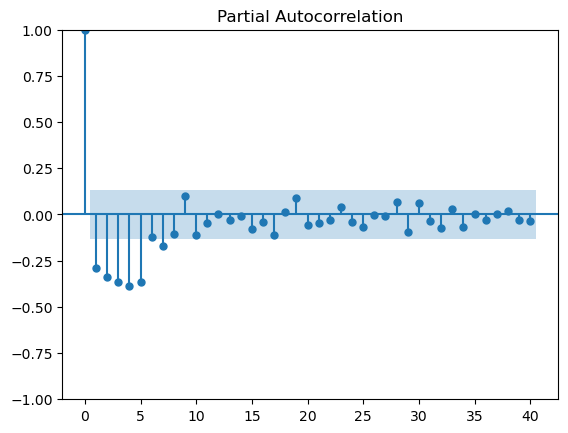

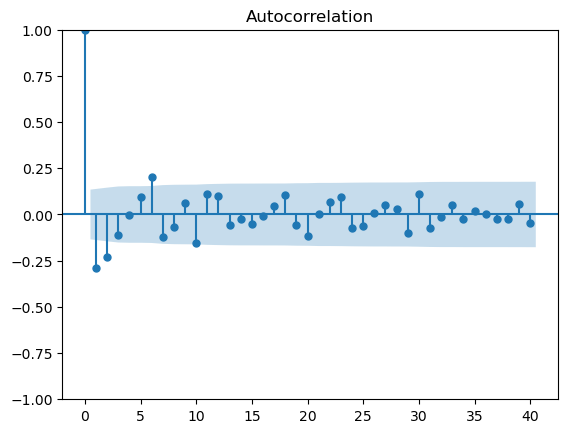

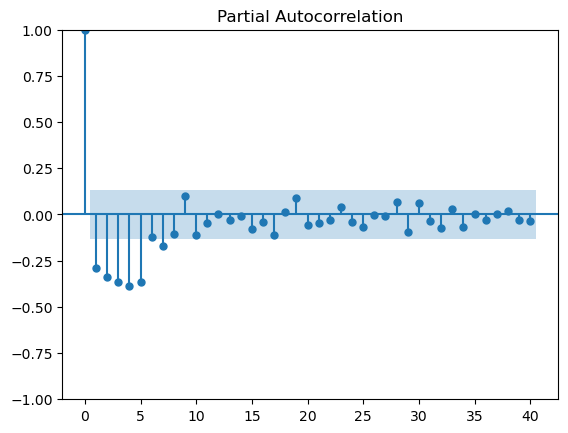

In [131]:
#Finding the ARIMA terms
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train, lags=40)
plot_pacf(train, lags=40)

In [135]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model

p, d, q = 5, 1, 2
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
model_summary = model_fit.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                  212
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -2223.153
Date:                Tue, 17 Dec 2024   AIC                           4462.306
Time:                        16:03:00   BIC                           4489.121
Sample:                             0   HQIC                          4473.145
                                - 212                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2821      0.188     -1.499      0.134      -0.651       0.087
ar.L2         -0.5291      0.190     -2.780      0.005      -0.902      -0.156
ar.L3         -0.4600      0.170     -2.708      0.007      -0.793      -0.127
ar.L4         -0.3363      0.168     -2.000      0.045      -0.666      -0.007
ar.L5         -0.1555      0.171     -0.908      0.364      -0.491       0.180
ma.L1         -1.6436      0.188     -8.730      0.000      -2.013      -1.275
ma.L2          0.6462      0.183      3.534      0.000       0.288       1.005
sigma2      1.166e+08   2.06e-10   5.66e+17      0.000    1.17e+08    1.17e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.87
Prob(Q):                              0.96   Prob(JB):                         0.09
Heteroskedasticity (H):               1.34   Skew:                             0.29
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.39e+34. Standard errors may be unstable.
"""

#### Make Time series prediction

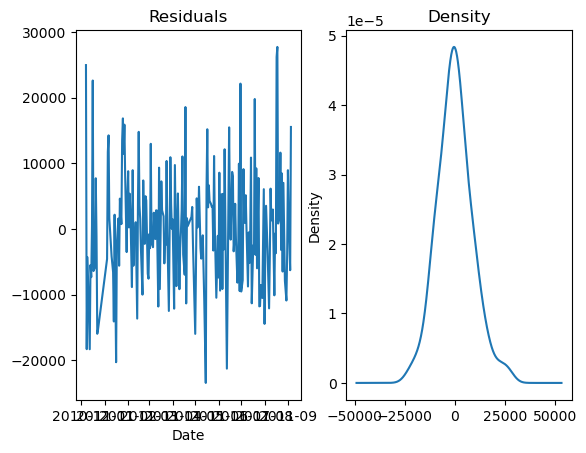

In [136]:
residuals =  model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind ='kde',ax=ax[1])
plt.show()

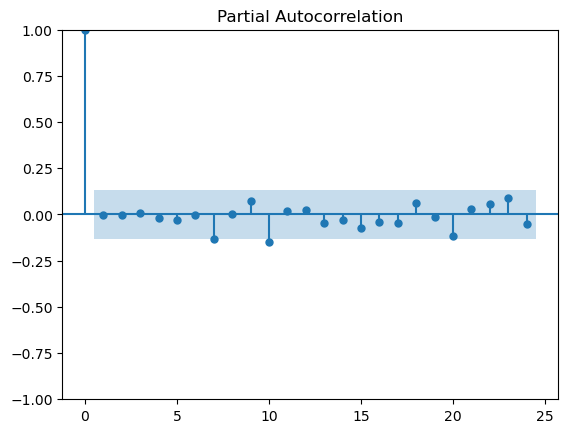

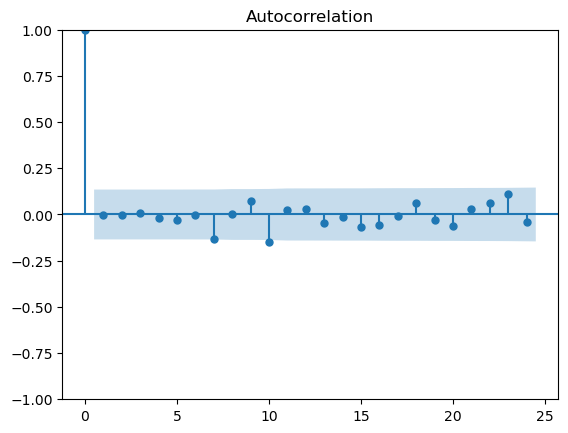

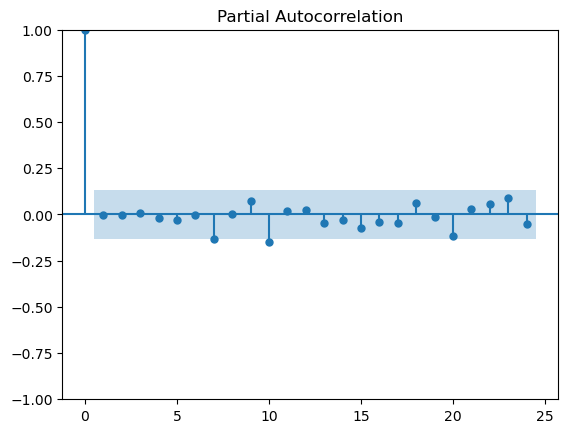

In [137]:
plot_acf(residuals)
plot_pacf(residuals)

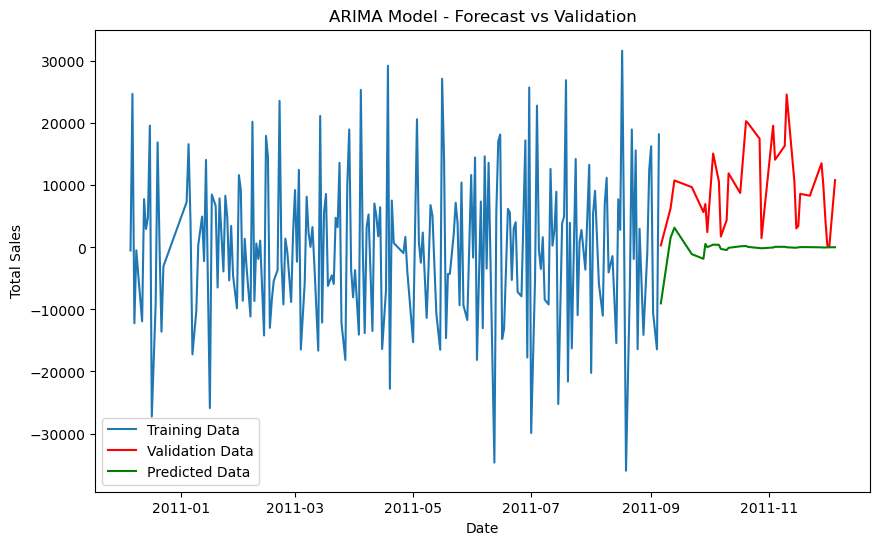

In [138]:
# Forecast for the validation period
forecast = model_fit.forecast(steps=len(valid))

# Display predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(train, label="Training Data")
plt.plot(valid, label="Validation Data", color='red')
plt.plot(valid.index, forecast, label="Predicted Data", color='green')
plt.title("ARIMA Model - Forecast vs Validation")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

### Evaluate the model

In [139]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate Evaluation Metrics
rmse = np.sqrt(mean_squared_error(valid, forecast))
mae = mean_absolute_error(valid, forecast)
mape = np.mean(np.abs((valid - forecast) / valid)) * 100  # Ensure no division by zero

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 11483.32
MAE: 9635.43
MAPE: nan%


In [140]:
import warnings
warnings.filterwarnings("ignore")

# Grid search for ARIMA parameters
p_values = [0, 1, 2, 3]
d_values = [0, 1]
q_values = [0, 1, 2]

def evaluate_arima(train, valid, p, d, q):
    try:
        model = ARIMA(train, order=(p, d, q))
        fitted_model = model.fit()
        forecast = fitted_model.forecast(steps=len(valid))
        rmse = np.sqrt(mean_squared_error(valid, forecast))
        return rmse
    except:
        return float("inf")

# Find best (p, d, q)
best_score, best_order = float("inf"), None
for p in p_values:
    for d in d_values:
        for q in q_values:
            rmse = evaluate_arima(train, valid, p, d, q)
            if rmse < best_score:
                best_score, best_order = rmse, (p, d, q)
            print(f"ARIMA({p}, {d}, {q}) RMSE: {rmse:.2f}")

print(f"\nBest ARIMA Order: {best_order} with RMSE: {best_score:.2f}")


ARIMA(0, 0, 0) RMSE: 11404.22
ARIMA(0, 0, 1) RMSE: 11567.28
ARIMA(0, 0, 2) RMSE: 11563.01
ARIMA(0, 1, 0) RMSE: 10902.82
ARIMA(0, 1, 1) RMSE: 11404.48
ARIMA(0, 1, 2) RMSE: 11637.45
ARIMA(1, 0, 0) RMSE: 11433.20
ARIMA(1, 0, 1) RMSE: 11564.27
ARIMA(1, 0, 2) RMSE: 11563.11
ARIMA(1, 1, 0) RMSE: 7188.32
ARIMA(1, 1, 1) RMSE: 11449.29
ARIMA(1, 1, 2) RMSE: 11627.04
ARIMA(2, 0, 0) RMSE: 11485.64
ARIMA(2, 0, 1) RMSE: 11586.97
ARIMA(2, 0, 2) RMSE: 11536.01
ARIMA(2, 1, 0) RMSE: 10880.43
ARIMA(2, 1, 1) RMSE: 11494.12
ARIMA(2, 1, 2) RMSE: 11604.85
ARIMA(3, 0, 0) RMSE: 11606.93
ARIMA(3, 0, 1) RMSE: 11529.73
ARIMA(3, 0, 2) RMSE: 11545.21
ARIMA(3, 1, 0) RMSE: 10907.09
ARIMA(3, 1, 1) RMSE: 11608.48
ARIMA(3, 1, 2) RMSE: 11581.57

Best ARIMA Order: (1, 1, 0) with RMSE: 7188.32


In [141]:
# Fit the ARIMA model for best parameters

p, d, q = 1, 1, 0
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

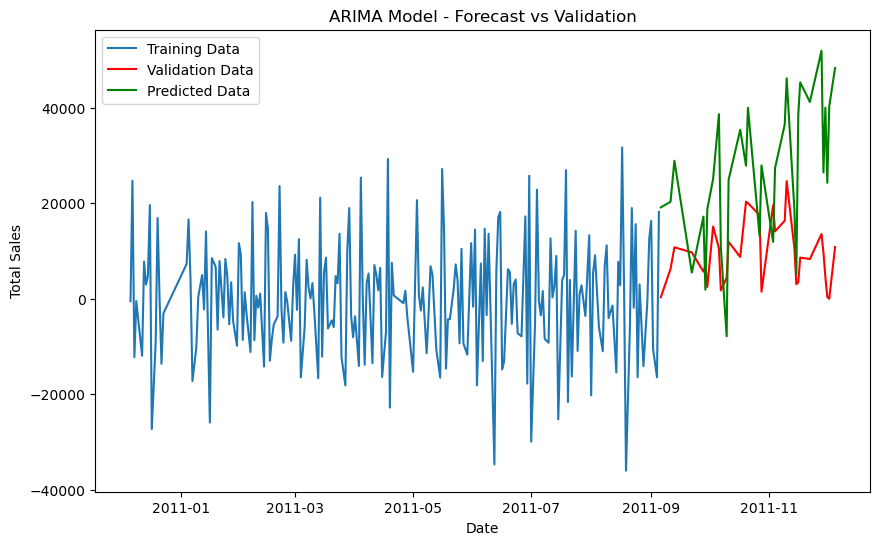

In [152]:
# Forecast for the validation period
forecast = model_fit.forecast(steps=len(valid))

# Display predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(train, label="Training Data")
plt.plot(valid, label="Validation Data", color='red')
plt.plot(valid.index, forecast, label="Predicted Data", color='green')
plt.title("ARIMA Model - Forecast vs Validation")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()



In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate Evaluation Metrics
rmse = np.sqrt(mean_squared_error(valid, forecast))
mae = mean_absolute_error(valid, forecast)
mape = np.mean(np.abs((valid - forecast) / valid)) * 100 

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 7188.32
MAE: 5683.32
MAPE: nan%


### SARIMA

In [144]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p, d, q = 1, 1, 0
model = SARIMAX(train, order=(p, d, q),seasonal_order=(p,d,q,12))
model_fit = model.fit()
model_summary = model_fit.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              resid   No. Observations:                  212
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -2255.057
Date:                            Tue, 17 Dec 2024   AIC                           4516.113
Time:                                    16:09:00   BIC                           4525.993
Sample:                                         0   HQIC                          4520.112
                                            - 212                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5463      0.057     -9.558      0.000      -0.658      -0.434
ar.S.L12      -0.3945      0.085     -4.658      0.000      -0.560      -0.228
sigma2      4.738e+08   2.75e-11   1.73e+19      0.000    4.74e+08    4.74e+08
===================================================================================
Ljung-Box (L1) (Q):                   8.83   Jarque-Bera (JB):                 3.62
Prob(Q):                              0.00   Prob(JB):                         0.16
Heteroskedasticity (H):               1.73   Skew:                            -0.19
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.2e+34. Standard errors may be unstable.
"""

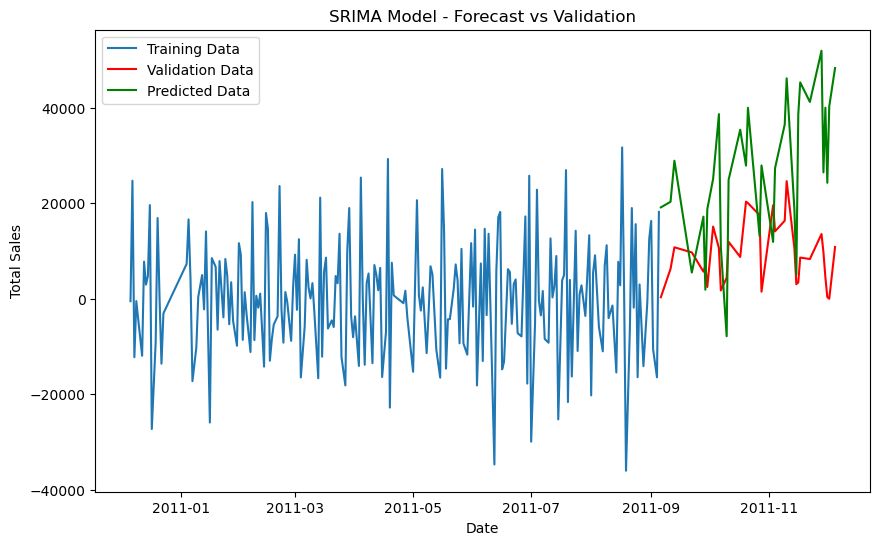

In [145]:
# Forecast for the validation period
forecast = model_fit.forecast(steps=len(valid))

# Display predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(train, label="Training Data")
plt.plot(valid, label="Validation Data", color='red')
plt.plot(valid.index, forecast, label="Predicted Data", color='green')
plt.title("SRIMA Model - Forecast vs Validation")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

In [146]:
 #Evaluate the model
rmse = np.sqrt(mean_squared_error(valid, forecast))
mae = mean_absolute_error(valid, forecast)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 22320.67
MAE: 19221.18


### XGBoost

In [147]:

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Prepare the dataset by creating lag-based features
def create_lag_features(df, n_lags):
    X, y = [], []
    for i in range(len(df) - n_lags):
        X.append(df[i:i+n_lags])  
        y.append(df[i+n_lags])    
    return np.array(X), np.array(y)


n_lags = 12  

# Convert time series data into supervised learning format
X, y = create_lag_features(train, n_lags)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [148]:
# 3. Train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [149]:
# 4. Forecast the next values
y_pred = model.predict(X_test)

# 5. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 11345.400702263985
Mean Squared Error: 203931007.9875308
Root Mean Squared Error: 14280.441449322594


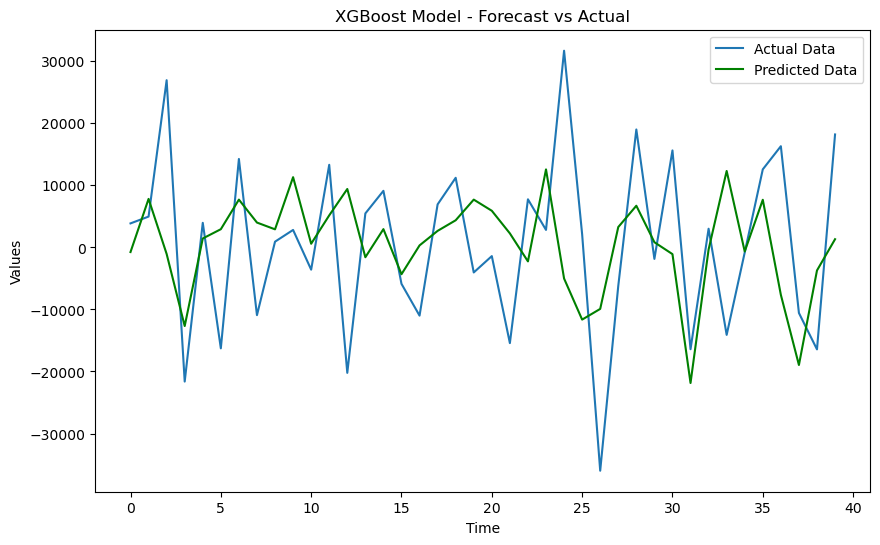

In [150]:
# 6. Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Data")
plt.plot(y_pred, label="Predicted Data", color='green')
plt.title("XGBoost Model - Forecast vs Actual")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()


In [70]:
# Train the model with some adjustments to intentionally worsen performance
model = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=50,  # Lower number of trees
                         learning_rate=0.5,  # Increase the learning rate
                         max_depth=2,  # Reduce tree depth
                         subsample=0.6,  # Use fewer samples per tree
                         colsample_bytree=0.6,  # Use fewer features per tree
                         reg_lambda=5,  # Increase L2 regularization 
                         reg_alpha=5)  # Increase L1 regularization

In [71]:
# Fit the model to the training data
model.fit(X_train, y_train)



XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=5,
             reg_lambda=5, ...)

In [72]:
# Predict on the test set
y_pred = model.predict(X_test)

In [73]:
# Calculate the errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the error metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 14067.355257141113
Mean Squared Error: 337113701.55124396
Root Mean Squared Error: 18360.656348596145


In [391]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate (step size)
    'max_depth': [3, 5, 7],  # Depth of the trees
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight (used in leaf)
    'subsample': [0.7, 0.8, 0.9, 1],  # Fraction of samples used for each tree
    'colsample_bytree': [0.7, 0.8, 1],  # Fraction of features used per tree
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [1, 5, 10]  # L2 regularization
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Negative MSE): {grid_search.best_score_}")

# Use the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the error metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 5, 'subsample': 0.8}
Best Score (Negative MSE): -175738834.81335622
Mean Absolute Error: 11950.268082695007
Mean Squared Error: 245219240.18282002
Root Mean Squared Error: 15659.477647189258
